# HW4

# II. Analyzing Data

In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from arch import arch_model

import warnings
warnings.filterwarnings("ignore")

import importlib
import utils as ut
importlib.reload(ut)

<module 'utils' from '/Users/chuan/github/0_Quantitative_Portfolio_Manager/homework/utils.py'>

# 2. The Factors

DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a "size" and "value" factor. Note that these three factors are already listed as excess returns. 

Use the data found in <file>'dfa analysis data.xlsx'</file>.

- FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{m}$. The sheet also contains data on two additional factors, SMB and HML, as well as the risk-free rate. You do not need any of these columns for the homework. Just use the MKT column, which is excess market returns. (So no need to subtract the risk-free rate.)

## 2.1 
The factors. Calculate their univariate performance statistics:
- mean
- volatility
- Sharpe
- VaR(.05)

Report these for the following three subsamples:
- Beginning - 1980
- 1981 - 2001
- 2002 - End

In [5]:
file_path = './../data/dfa_analysis_data.xlsx'

descriptions = pd.read_excel(file_path) # first sheet
descriptions.set_index(descriptions.columns[0], inplace=True)
descriptions.index.name = 'Symbol'
display(descriptions)

risk_free_rate = pd.read_excel(file_path, sheet_name='factors')[['Date', 'RF']].set_index('Date')
factors = pd.read_excel(file_path, sheet_name='factors').drop(columns=['RF']).set_index('Date')
display(factors)

portfolio_total_returns = pd.read_excel(file_path, sheet_name='portfolios (total returns)').set_index('Date')
display(portfolio_total_returns)

,Name,Unit,Construction,Description
Symbol,,,,
Mkt-RF,Market,Excess Return,Market-cap-weighted,US Equities
SMB,Size,Excess Return,Small Minus Big,Long small stocks and short big stocks
HML,Value,Excess Return,High Minus Low,Long value (high book-to-market) stocks and sh...
RF,Risk-free rate,Total Return,Tbills,NaN


,Mkt-RF,SMB,HML
Date,,,
1926-07-31,0.0296,-0.0256,-0.0243
1926-08-31,0.0264,-0.0117,0.0382
1926-09-30,0.0036,-0.0140,0.0013
1926-10-31,-0.0324,-0.0009,0.0070
1926-11-30,0.0253,-0.0010,-0.0051
...,...,...,...
2023-03-31,0.0251,-0.0551,-0.0885
2023-04-30,0.0061,-0.0335,-0.0004
2023-05-31,0.0035,0.0161,-0.0772


,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.0582,-0.0170,0.0049,-0.0146,0.0205,0.0121,0.0242,0.0049,-0.0260,-0.0033,...,0.0159,0.0153,0.0130,0.0027,0.0247,0.0345,0.0609,0.0203,0.0311,0.0056
1926-08-31,-0.0202,-0.0803,0.0138,0.0146,0.0840,0.0236,-0.0118,0.0401,0.0050,0.0617,...,0.0133,0.0387,0.0200,0.0217,0.0534,0.0101,0.0419,0.0201,0.0548,0.0776
1926-09-30,-0.0483,-0.0262,-0.0434,-0.0327,0.0086,-0.0265,-0.0126,0.0108,-0.0355,-0.0094,...,0.0109,-0.0053,-0.0176,0.0146,0.0087,-0.0129,0.0365,0.0009,-0.0075,-0.0243
1926-10-31,-0.0937,-0.0355,-0.0349,0.0344,-0.0255,-0.0281,-0.0327,-0.0507,-0.0802,-0.0132,...,-0.0334,-0.0266,-0.0211,-0.0311,-0.0535,-0.0274,-0.0301,-0.0224,-0.0467,-0.0581
1926-11-30,0.0559,0.0419,0.0246,-0.0445,0.0054,0.0310,-0.0237,0.0301,0.0515,0.0273,...,0.0344,0.0239,0.0373,0.0493,0.0182,0.0429,0.0253,0.0152,0.0366,0.0256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,-0.1056,-0.0633,-0.0696,-0.0721,-0.0979,-0.0312,-0.0320,-0.0361,-0.0503,-0.1036,...,0.0125,-0.0036,-0.0206,-0.0382,-0.1222,0.0822,0.0311,0.0100,-0.0377,-0.0664
2023-04-30,0.0257,-0.0204,-0.0156,-0.0273,-0.0417,-0.0293,0.0026,-0.0322,-0.0292,-0.0291,...,-0.0190,-0.0222,-0.0037,-0.0163,0.0024,0.0116,0.0133,0.0119,0.0237,0.0360
2023-05-31,0.0479,0.0250,0.0323,-0.0110,-0.0183,0.0114,0.0342,0.0208,0.0198,-0.0494,...,0.0016,-0.0232,-0.0399,-0.0314,-0.0642,0.0557,-0.0121,-0.0508,-0.0729,-0.0470


In [11]:
ut.summary_statistics_annualized(factors)[['Mean', 'Vol', 'Sharpe', 'VaR 5%']]

,Mean,Vol,Sharpe,VaR 5%
Mkt-RF,0.0814,0.1851,0.4398,-0.0802
SMB,0.0228,0.1098,0.2075,-0.0421
HML,0.0412,0.1238,0.3328,-0.0421


In [22]:
agg_years = [(1926, 1980), (1981, 2001), (2002, 2023)]
all_stats = [
    ut.summary_statistics_annualized(factors.loc[f'{start}':f'{end}'])[['Mean', 'Vol', 'Sharpe', 'VaR 5%']]
    .assign(Period=f'{start}-{end}')
    .reset_index()
    .rename(columns={'index': 'Factor'})
    .set_index(['Period', 'Factor'])
    for start, end in agg_years
]

result = pd.concat(all_stats)
result

Mean    Vol  Sharpe  VaR 5%
Period    Factor                               
1926-1980 Mkt-RF  0.0811 0.2051  0.3957 -0.0840
          SMB     0.0340 0.1146  0.2966 -0.0434
          HML     0.0495 0.1338  0.3697 -0.0429
1981-2001 Mkt-RF  0.0773 0.1574  0.4908 -0.0645
          SMB    -0.0009 0.1183 -0.0073 -0.0465
          HML     0.0638 0.1112  0.5736 -0.0418
2002-2023 Mkt-RF  0.0862 0.1553  0.5549 -0.0791
          SMB     0.0175 0.0864  0.2023 -0.0382
          HML    -0.0017 0.1075 -0.0159 -0.0417

## 2.2 
Based on the factor statistics above, answer the following.

### a) 
Does each factor have a premium (positive expected excess return) in each subsample?

All 3 factors possess positive premiums in the sub period leading to 1980. Between 1981-2001 the Size factor provides no mean excess returns (discount of 8 basis points), but recovers to provide some premium again between 2002 and 2022. Similarly, the Value factor, provides premium up untill 2001, post which the mean excess returns reduce significantly for the period between 2001 and 2022, with negative returns till 2021. The Market factor consistently provides positive premium throughout the period of analysis.

### b) 
Does the premium to the size factor get smaller after 1980?

The premium of the size factor does decline after 1980, going almost to 0 between 1981 and 2001 and then recovering to ~1.9% (still lower than pre 1980 returns). According to a recent study by AQR Capital Management (https://www.aqr.com/Insights/Perspectives/There-is-No-Size-Effect-Daily-Edition), the size premia only exists in conjunction with the market beta factor. The apparent outperformance of small versus large caps after adjusting for market beta in the original work by Fama French on the data pre-1980's was biased by misestimated betas due to liquidity differences. 

### c) 
Does the premium to the value factor get smaller during the 1990's?

The premium to value factor increases in the sub-sample of 1981-2001 as compared to 1926-1980, but then experiences a significant decline post the 2002 internet bubble burst and posits negative mean excess returns till 2021, and then recovering significantly again in 2022. 

The tech bubble in the late 1990s and early 2000s had a huge influence on the spread, as the value factor experienced significant drawdowns, with tech stocks trading at levels far from fundamentals. In general, the value factor traded at a negative spread — a logical result, since the long portfolio is always cheaper than the short. 

Source - https://blogs.cfainstitute.org/investor/2017/09/12/there-is-value-in-the-value-factor/

### d) 
How have the factors performed since the time of the case, (2002-present)?

Since 2002, the Market Factor has posted highest premiums between the three subsamples. While the Size factor also posted a premium of ~2.4%, as discussed in the AQR study above, it could be interpreted as a high correlation with the market beta. The value factor is in a deep drawdown since the recovery post the Tech bubble burst. Technology disruption in 2010s and longer bull runs and recoveries aftor financial crises of 2008 and 2020, have led to companies trading farther away from their fundamentals, turning the value factor into a losing bet.

## 2.3 
The factors are constructed in such a way as to reduce correlation between them. 

Report the correlation matrix across the three factors. Does the construction method succeed in keeping correlations small? 

Overall, the correlations between the three factors are low and thus the construction method succeeds in its objective. The Size and Value factors, especially post very low correlations, but are still relatively more correlated to the market factor,

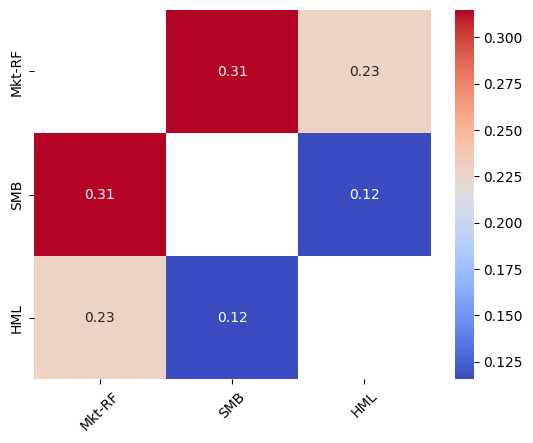

Max corr 0.31: ('SMB', 'Mkt-RF')
Min corr 0.12: ('SMB', 'HML')


In [24]:
ut.correlation_heatmap(factors)

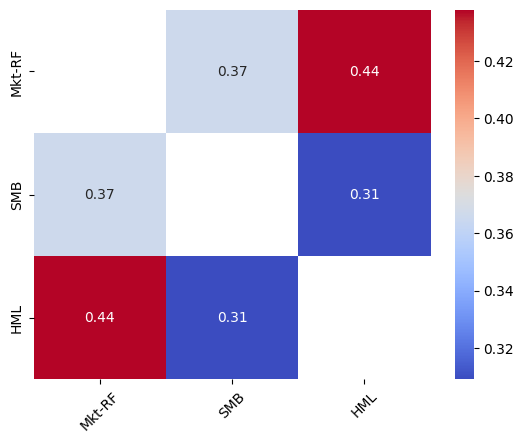

Max corr 0.44: ('HML', 'Mkt-RF')
Min corr 0.31: ('SMB', 'HML')


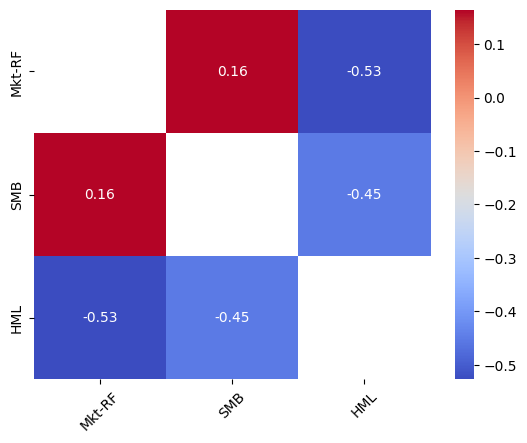

Max corr 0.16: ('SMB', 'Mkt-RF')
Min corr -0.53: ('Mkt-RF', 'HML')


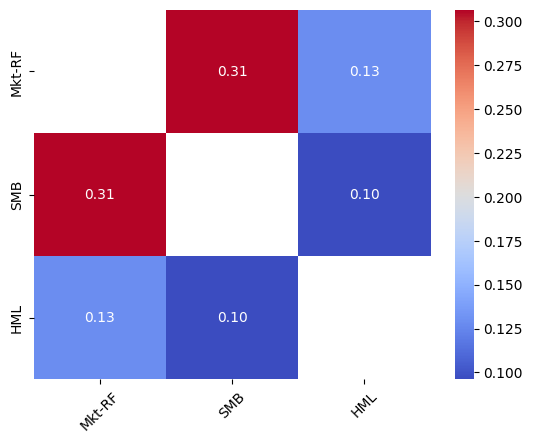

Max corr 0.31: ('SMB', 'Mkt-RF')
Min corr 0.10: ('SMB', 'HML')


In [29]:
for start, end in agg_years:
    ut.correlation_heatmap(factors.loc[f'{start}':f'{end}'])

## 2.4
Plot the cumulative returns of the three factors. Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

<Axes: xlabel='Date'>

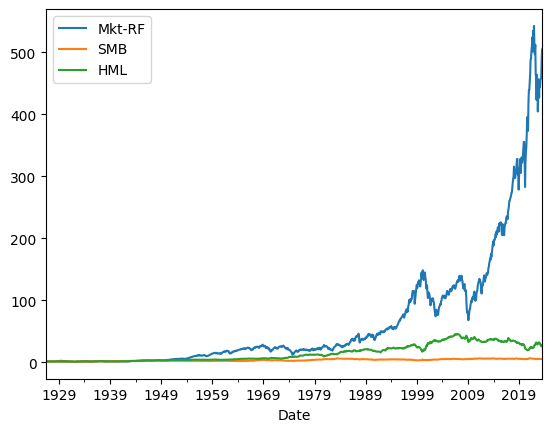

In [32]:
cum_rets = (1 + factors).cumprod()
cum_rets.plot()

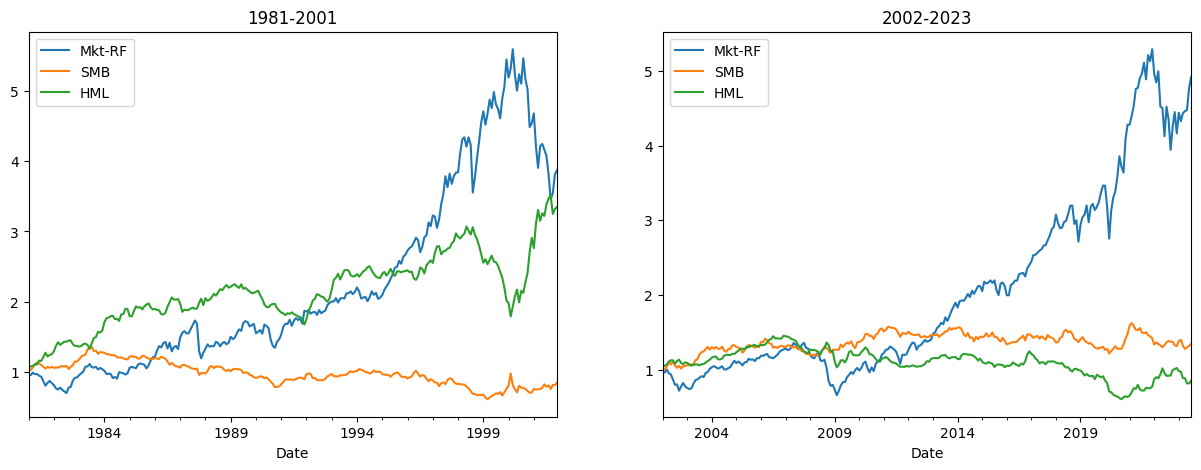

In [39]:
agg_years = [(1981, 2001), (2002, 2023)]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, (start, end) in enumerate(agg_years):
    (1 + factors.loc[f'{start}':f'{end}']).cumprod().plot(ax=axes[i], title=f'{start}-{end}')

## 2.5 
Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you advise DFA to continue emphasizing all three factors?

As per the graphs above, it appears that the market risk factor was valuable in both sub-samples. However, the Market Factor sees a steep decline with the Tech bubble burst in late 2001, during which time the value factor benefits from the depressed stock prices to post a premium. The Size factor posts near zero or negative returns for the entire sub-sample of 1981-2001. 

With a good recovery post the Tech Bubble burst and similar bull run post the 2008 financial crisis, the Market-factor significantly outperforms Size and Value in the 2002-2022 sub-sample. Both Size and Value factor post meagre returns during this period, with the value factor experiencing declining premiums as companies traded further away from their fundamentals. This Value factor might still be beneficial given its diversification effects.

Though all 3 factors still possess some relevant characterisitics, it appears that Factor rotation might be a better strategy in hindsight. The size factor seems our of favor for a long time now and the returns seem correlated to the Market Factor. DFA should also try to explore other factors such as volatility, liquidity, momentum etc. to generate alpha while sticking to their belief of capital markets being efficient.

# 3. CAPM

DFA believes that premia in stocks and stock portfolios is related to the three factors. Let's test 25 equity portfolios that span a wide range of size and value measures

- PORTFOLIOS: Monthly total return data on 25 equity portfolios sorted by their size-value characteristics. Denote these as $r^{i}$, for n = 1,....,25.
- Note that while the factors were given as excess returns, the portfolios are total returns.
- For this entire problem, focus on the 1981-Present subsample.

## 3.1 
Summary Statistics. For each portfolio,
- Use the Risk-Free rate column in the factors tab to convert these total returns to excess returns.
- Calculate the (annualized) univariate statistics from 1.1.
- Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics?

Based on the scatter plots below, we do not get a clear indication if the differences in the mean excess returns are explained by differences in either their VaR or their Volatility. Given VaR is a factor of portfolios volatility, more the volatility deeper the VaR threshold, the return differences might be explained slightly by the differences in the volatility. A linear pattern can be observed between volatility and mean excess returns to support the previous arguments, but the evidence is not very concrete from the plots below.

In [45]:
portfolio_excess_returns = portfolio_total_returns.sub(risk_free_rate['RF'], axis=0).loc['1981':]
ut.summary_statistics_annualized(portfolio_excess_returns)[['Mean', 'Vol', 'Sharpe', 'VaR 5%']]

,Mean,Vol,Sharpe,VaR 5%
SMALL LoBM,0.0086,0.2726,0.0316,-0.1211
ME1 BM2,0.0918,0.2357,0.3894,-0.0957
ME1 BM3,0.0927,0.1979,0.4682,-0.0858
ME1 BM4,0.1174,0.1924,0.6101,-0.0764
SMALL HiBM,0.1294,0.2083,0.6214,-0.0886
ME2 BM1,0.0599,0.2448,0.2447,-0.1040
ME2 BM2,0.1019,0.2042,0.4988,-0.0849
ME2 BM3,0.1071,0.1848,0.5795,-0.0791
ME2 BM4,0.1089,0.1807,0.6026,-0.0774
ME2 BM5,0.1163,0.2138,0.5437,-0.0967


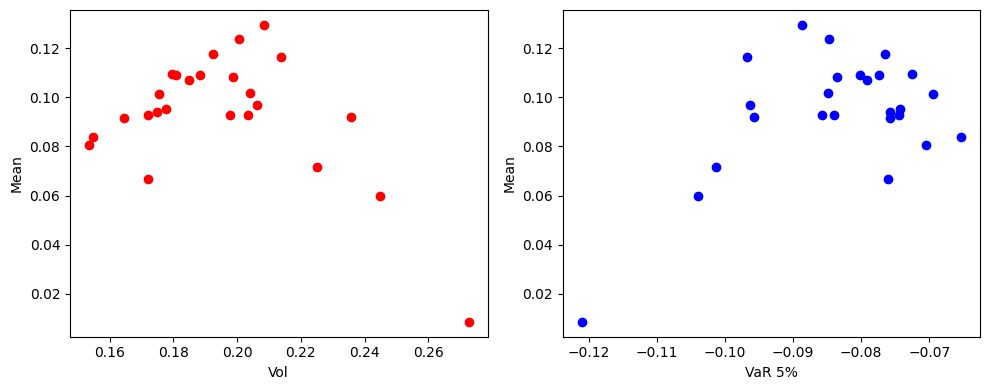

In [54]:
summary_stats = ut.summary_statistics_annualized(portfolio_excess_returns)[['Mean', 'Vol', 'Sharpe', 'VaR 5%']]
mean = summary_stats['Mean']
vol = summary_stats['Vol']
VaR = summary_stats['VaR 5%']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].scatter(vol, mean, c='r')
axes[0].set_ylabel('Mean')
axes[0].set_xlabel('Vol')
axes[1].scatter(VaR, mean, c='b')
axes[1].set_ylabel('Mean')
axes[1].set_xlabel('VaR 5%')
plt.tight_layout()

## 3.2 CAPM
The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio's) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.)

Specifically, it asserts that, for any excess return, $\tilde{r}^{i}$, its mean is proportional to the mean excess return of the market, $\tilde{r}^{m}$, where the proporitonality is the regression beta of $\tilde{r}^{i}$ on $\tilde{r}^{m}$.

$$\mathop{\mathbb{E}}[\tilde{r}^{i}_{t}] = \beta \mathop{\mathbb{E}}[\tilde{r}^{m}_{t}]$$
Let's examine whether that seems plausible.

### a) 
For each of the n = 25 test portfolios, run the CAPM time-series regression:
$$\tilde{r}_{t}^{i} = α^{i} + β^{i,m}\tilde{r}^{m}_{t} + ε_{t}$$
So you are running 25 separate regressions, each using the T-sized sample of time-series data.

### b) 
Report the estimated $β^{i,m}$, Treynor Ratio, $α^{i}$, and Information Ratio for each of the n regressions.

In [67]:
market = factors.loc['1981':]['Mkt-RF']

res = []
for col in portfolio_excess_returns.columns:
    excess_rets = portfolio_excess_returns[[col]]
    res.append(ut.regression_statistics_annualized(excess_rets, market))
regressions = pd.concat(res)
regressions

,Alpha,Beta,R^2,Treynor Ratio,Information Ratio
SMALL LoBM,-0.1018,1.3501,0.5984,0.0064,-0.5893
ME1 BM2,-0.0031,1.1603,0.5913,0.0791,-0.0207
ME1 BM3,0.0081,1.0340,0.6660,0.0896,0.0708
ME1 BM4,0.0383,0.9673,0.6166,0.1214,0.3213
SMALL HiBM,0.0486,0.9883,0.5492,0.1310,0.3476
ME2 BM1,-0.0492,1.3334,0.7239,0.0449,-0.3822
ME2 BM2,0.0095,1.1289,0.7456,0.0902,0.0926
ME2 BM3,0.0233,1.0248,0.7503,0.1045,0.2520
ME2 BM4,0.0295,0.9704,0.7036,0.1122,0.3002
ME2 BM5,0.0255,1.1094,0.6566,0.1048,0.2038


### c) 
If CAPM were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

If CAPM were true, we would observe **same** Treynor ratios for all 25 portfolios as the portfolio returns should completely be a function of market returns (SPY). However, as we observe, most portfolios have varying Treynor ratios, indicating towards and high alpha and/or low regression beta. 

The alphas should similarly have been lower (ideally 0) for all portfolios and we should have also seen low absolute magnitude of the residuals, resulting in lower (ideally 0) information ratios. But we observe, that the alphas are still higher than expected and the Information ratios are higher than expected indicating towards presence of other regressors that should be included in the model.

## 3.3 Cross-sectional Estimation

Let's test (CAPM) directly. We already have what we need:

- The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
- The regressor, (x): the market beta from each of the n = 25 time-series regressions.

Then we can estimate the following equation:
$$ \underbrace{\mathop{\mathbb{E}}[\tilde{r}^{i}]}_\text{n x 1 data} = 
    \underbrace{\eta}_\text{regression intercept} +
    \underbrace{\beta^{i,m}}_\text{n x 1 data} *\underbrace{\lambda_{m}}_\text{regression estimate} + \underbrace{\upsilon}_\text{n x 1 residuals} $$
- Note that we use sample means as estimates of $\mathop{\mathbb{E}}[\tilde{r}^{i}]$.
- This is a weird regression! The regressors are the betas from the time-series regressions we already ran!
- This is a single regression, where we are combining evidence across all n = 25 series. Thus, it is a cross-sectional regression!
- The notation is trying to emphasize that the intercept is different than the time-series $\alpha$ and that the regressor coefficient is different than the time-series betas.

### a) 
Report the R-squared of this regression.


### b) 
Report the intercept, $\eta$.


### c) 
Report the regression coefficient, $\lambda_{m}$.

In [ ]:
ut.regression_statistics_annualized(portfolio_excess_returns.mean().to_frame('Mean Portfolio Excess Returns'), regressions['Beta'])

,Alpha,Beta,R^2,Treynor Ratio,Information Ratio
Mean Portfolio Excess Returns,0.2038,-0.0087,0.2728,-10.8632,33.8782


What would these three statistics be if (CAPM) were true?

If CAPM were true and the regression beta for the excess returns on the market factor explained the portfolio excess returns, we would expect a very low alpha, a high beta and a very high R-Squared from the above regression. Since, all market betas should be explaining the same factor i.e. SPY, we should expect them to be heavily correlated.


## 3.4
Broadly speaking, do these results support DFA's belief in size and value portfolios containing premia unrelated to the CAPM?

Low R-Squared and Betas and higher alpha from the cross-sectional regression in the previous question, indicat the presence of other risk factors in the market that can explain excess returns of equity portfolios. Also, as shown by the Fama-French paper, size and value have posted premiums in the past and thus can be used to explain mean excess returns in better capacity than CAPM alone. These results do support DFA's belief in size and value portfolios containing premia unrelated to CAPM.

Using Size and Value as additional factors in the regression for the 25 portfolios, we see a higher R-Squared in the regression, further strengthening DFA's belief in existence of premia in Value and Size Factors